In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# File paths
file1_path = "C:/Users/Ankit/Downloads/data.xlsx"
file2_path = "C:/Users/Ankit/Downloads/data2.xlsx"
# Import Excel files into dataframes
df1 = pd.read_excel(file1_path)
df2 = pd.read_excel(file2_path)

In [3]:
# Display the first few rows of each dataframe
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
            PRN        Name of Student  DC & DBMS / 40  OOP with Java / 40  \
0  230340125001     Aditya Raju Daroli              28                  28   
1  230340125002        Ahmad Raza Khan              26                  30   
2  230340125003                Akash S              29                  29   
3  230340125004  Ambadkar Aditya Manoj              22                  22   
4  230340125005          Ankit Malviya              30                  20   

   P & R P / 40  AAS / 40  DV-A & R / 40  Big Data Tech / 40  LP & CC / 40  \
0            26        23             33                  22            26   
1            26        19             28                  25            24   
2            26        20             29                  26            26   
3            17        17             28                  20            23   
4            23        22             31                  25            31   

   PML / 40  Total / 320 Result  
0        31    

In [4]:
# Add a new column "institute" with default values to each dataframe
default_value_df1 = "CDAC"
default_value_df2 = "SUNBEAM"

df1 = df1.assign(Institute=default_value_df1)
df2 = df2.assign(Institute=default_value_df2)

# Display the first few rows of each dataframe with the new column
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
            PRN        Name of Student  DC & DBMS / 40  OOP with Java / 40  \
0  230340125001     Aditya Raju Daroli              28                  28   
1  230340125002        Ahmad Raza Khan              26                  30   
2  230340125003                Akash S              29                  29   
3  230340125004  Ambadkar Aditya Manoj              22                  22   
4  230340125005          Ankit Malviya              30                  20   

   P & R P / 40  AAS / 40  DV-A & R / 40  Big Data Tech / 40  LP & CC / 40  \
0            26        23             33                  22            26   
1            26        19             28                  25            24   
2            26        20             29                  26            26   
3            17        17             28                  20            23   
4            23        22             31                  25            31   

   PML / 40  Total / 320 Result Institute  
0    

In [5]:
# Merge the dataframes using concat
merged_df = pd.concat([df1, df2], ignore_index=True)

# Display the merged dataframe
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
              PRN            Name of Student  DC & DBMS / 40  \
0    230340125001         Aditya Raju Daroli              28   
1    230340125002            Ahmad Raza Khan              26   
2    230340125003                    Akash S              29   
3    230340125004      Ambadkar Aditya Manoj              22   
4    230340125005              Ankit Malviya              30   
..            ...                        ...             ...   
108  230344225055    Vedant Suresh Nimbalkar              25   
109  230344225056        Vivek Singh Chauhan              28   
110  230344225057   Wartale Vijay Yadnyakant              27   
111  230344225058  Yogeshwar Nandkumar Patil              23   
112  230344225059                Anita Dogra              25   

     OOP with Java / 40  P & R P / 40  AAS / 40  DV-A & R / 40  \
0                    28            26        23             33   
1                    30            26        19             28   
2              

In [6]:
# Display the columns of the merged dataframe
print("Columns of Merged DataFrame:")
print(merged_df.columns)

Columns of Merged DataFrame:
Index(['PRN', 'Name of Student', 'DC & DBMS / 40', 'OOP with Java / 40',
       'P & R P / 40', 'AAS / 40', 'DV-A & R / 40', 'Big Data Tech / 40',
       'LP & CC / 40', 'PML / 40', 'Total / 320', 'Result', 'Institute'],
      dtype='object')


In [7]:
# Filter and count students who scored more than 192 in Total
students_above_192 = merged_df[merged_df['Total / 320'] > 192]
count_students_above_192 = students_above_192.shape[0]

# Display the count
print(f"Number of students who scored more than 192 in Total: {count_students_above_192}")

Number of students who scored more than 192 in Total: 67


In [8]:
# Count students above 192 for each institute
students_count_by_institute = students_above_192['Institute'].value_counts()

# Display the count for each institute
print("Number of students who scored more than 192 in Total by Institute:")
print(students_count_by_institute)

Number of students who scored more than 192 in Total by Institute:
SUNBEAM    35
CDAC       32
Name: Institute, dtype: int64


In [9]:
# Find the highest scorer
highest_scorer = merged_df.loc[merged_df['Total / 320'].idxmax()]

# Display the highest scorer's details
print("Highest Scorer:")
print(highest_scorer)

Highest Scorer:
PRN                   230344225006
Name of Student       Viraj Prabhu
DC & DBMS / 40                  34
OOP with Java / 40              32
P & R P / 40                    33
AAS / 40                        29
DV-A & R / 40                   30
Big Data Tech / 40              31
LP & CC / 40                    28
PML / 40                        31
Total / 320                    248
Result                        Pass
Institute                  SUNBEAM
Name: 61, dtype: object


In [10]:
# Get the details of the highest scorer for each institute
highest_scorers_details = merged_df.loc[highest_scorers_by_institute, ['Name of Student', 'Total / 320', 'Institute']]

# Display the details of the highest scorer for each institute
print("Highest Scorer by Institute:")
print(highest_scorers_details)

NameError: name 'highest_scorers_by_institute' is not defined

In [ ]:
subject_columns = ['DC & DBMS / 40', 'OOP with Java / 40',
       'P & R P / 40', 'AAS / 40', 'DV-A & R / 40', 'Big Data Tech / 40',
       'LP & CC / 40', 'PML / 40']
subject_scores_df = merged_df[subject_columns]

# Find the highest scorer in each subject
highest_scorers_by_subject = subject_scores_df.idxmax()
for subject, scorer in highest_scorers_by_subject.iteritems():
    student_name = merged_df.at[scorer, 'Name of Student']
    subject_marks = merged_df.at[scorer, subject]
    institute_name = merged_df.at[scorer, 'Institute']
    
    print(f"Subject: {subject}")
    print(f"Highest Scorer: {student_name}")
    print(f"Marks in {subject}: {subject_marks}")
    print(f"Institute: {institute_name}")
    print("-" * 30)

In [11]:
# Group the dataframe by 'Institute' and find the highest scorer in each subject for each institute
highest_scorers_by_institute = merged_df.groupby('Institute')[subject_columns].idxmax()

# Display the highest scorer in each subject along with their name, for each institute
for institute, scorers in highest_scorers_by_institute.iterrows():
    print(f"Institute: {institute}")
    print("-" * 30)
    for subject, scorer in scorers.iteritems():
        student_name = merged_df.at[scorer, 'Name of Student']
        subject_marks = merged_df.at[scorer, subject]
        print(f"Subject: {subject}")
        print(f"Highest Scorer: {student_name}")
        print(f"Marks in {subject}: {subject_marks}")
        print("-" * 30)

NameError: name 'subject_columns' is not defined

In [12]:
# Update 'Result' column based on the condition
merged_df['Result'] = merged_df.apply(
    lambda row: 'Fail' if any(row[subject] < 16 for subject in subject_columns) else 'Pass',
    axis=1
)

# Display the updated dataframe
print(merged_df)

NameError: name 'subject_columns' is not defined

In [ ]:
# Count the number of students who have passed out of the total
total_students = len(merged_df)
passed_students = len(merged_df[merged_df['Result'] == 'Pass'])
percentage_passed = (passed_students / total_students) * 100

# Display the number of students who have passed out of the total
print(f"Number of students who have passed out of {total_students} total: {passed_students}")
print(f"Percentage of students who have passed: {percentage_passed:.2f}%")
print()

# Count the number of students who have passed for each institute
passed_students_by_institute = merged_df[merged_df['Result'] == 'Pass'].groupby('Institute').size()

# Display the number of students who have passed for each institute
print("Number of students who have passed by institute:")
print(passed_students_by_institute)

In [ ]:

# Group by institute and count the number of students who passed
passed_students_by_institute = merged_df[merged_df['Result'] == 'Pass'].groupby('Institute').size()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(passed_students_by_institute, labels=passed_students_by_institute.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passed Students by Institute')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [ ]:

# Add a new column "60 above" based on the condition
merged_df['60 above'] = merged_df['Total / 320'].apply(lambda x: 'Y' if x / 320 > 0.6 else 'N')

# Display the updated dataframe
print(merged_df)

In [ ]:
# Count the number of students where "60 above" is 'Y'
students_above_60_count = len(merged_df[merged_df['60 above'] == 'Y'])

# Group by institute and count the number of students above 60% for each institute
students_above_60_by_institute = merged_df[merged_df['60 above'] == 'Y'].groupby('Institute').size().sort_index()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(students_above_60_by_institute, labels=students_above_60_by_institute.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students Above 60% by Institute')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# Display the count of students above 60%
print(f"Number of students above 60%: {students_above_60_count}")
# Count students above 192 for each institute
students_count_by_institute = students_above_192['Institute'].value_counts()

# Display the count for each institute
print("Number of students who scored more than 192 in Total by Institute:")
print(students_count_by_institute)

In [ ]:
# Count the number of students where "60 above" is 'N'
students_below_60_count = len(merged_df[merged_df['60 above'] == 'N'])

# Group by institute and count the number of students below 60% for each institute
students_below_60_by_institute = merged_df[merged_df['60 above'] == 'N'].groupby('Institute').size().sort_index()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(students_below_60_by_institute, labels=students_below_60_by_institute.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students Below 60% by Institute')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# Display the count of students below 60%
print(f"Number of students below 60%: {students_below_60_count}")

In [ ]:
# Count the number of students where "Result" is 'Fail'
failed_students_count = len(merged_df[merged_df['Result'] == 'Fail'])

# Group by institute and count the number of failed students for each institute
failed_students_by_institute = merged_df[merged_df['Result'] == 'Fail'].groupby('Institute').size().sort_index()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(failed_students_by_institute, labels=failed_students_by_institute.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Failed Students by Institute')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# Display the count of failed students
print(f"Number of failed students: {failed_students_count}")


In [ ]:
# Calculate statistics for each subject
for subject in subject_columns:
    # Calculate average score
    avg_score = merged_df[subject].mean()
    
    # Calculate mode score
    mode_score = stats.mode(merged_df[subject])[0][0]
    
    # Calculate median score
    median_score = merged_df[subject].median()
    
    # Identify outliers using the IQR method
    Q1 = merged_df[subject].quantile(0.25)
    Q3 = merged_df[subject].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged_df[(merged_df[subject] < lower_bound) | (merged_df[subject] > upper_bound)]
    outliers=outliers[['Name of Student','institute']]
    
    # Print statistics for the subject
    print(f"Subject: {subject}")
    print(f"Average Score: {avg_score:.2f}")
    print(f"Mode Score: {mode_score}")
    print(f"Median Score: {median_score}")
    print(f"Outliers:\n{outliers}\n")

In [13]:
# Bar Plot: Average scores in each subject for different institutes
for subject in subject_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Institute', y= subject , data=merged_df)
    plt.title('Average Scores in DC & DBMS / 40 by Institute')
    plt.show()

    print("-" * 30)


NameError: name 'subject_columns' is not defined

In [14]:
# Histogram: Score distribution
for subject in subject_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(merged_df[subject], bins=10, edgecolor='k')
    plt.title('Score Distribution in '+ subject)
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.show()


    print("-" * 30)

NameError: name 'subject_columns' is not defined

In [15]:
# Box Plot: Spread of scores
for subject in subject_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[subject])
    plt.title('Spread of Scores in '+ subject)
    plt.xlabel( subject)
    plt.show()
    print("-" * 30)

NameError: name 'subject_columns' is not defined

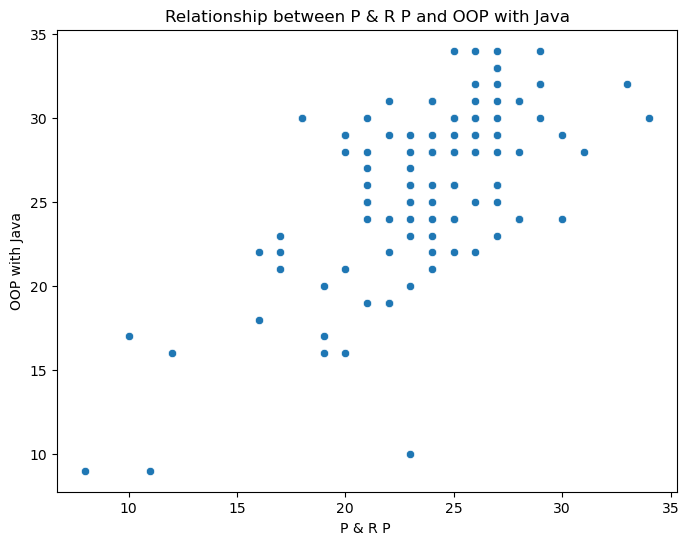

In [16]:
# Scatter Plot: Relationship between scores in P & R P / 40 and OOP with Java / 40
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P & R P / 40', y='OOP with Java / 40', data=merged_df)
plt.title('Relationship between P & R P and OOP with Java')
plt.xlabel('P & R P ')
plt.ylabel('OOP with Java')
plt.show()

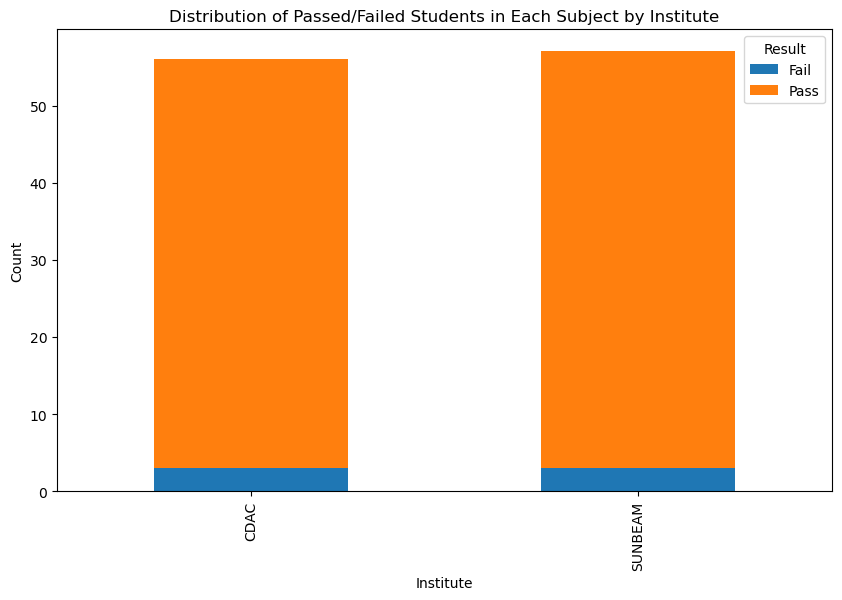

In [17]:
# Stacked Bar Plot: Distribution of passed/failed students in each subject by institute
pass_fail_counts = merged_df.groupby(['Institute', 'Result']).size().unstack()
pass_fail_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Passed/Failed Students in Each Subject by Institute')
plt.xlabel('Institute')
plt.ylabel('Count')
plt.show()

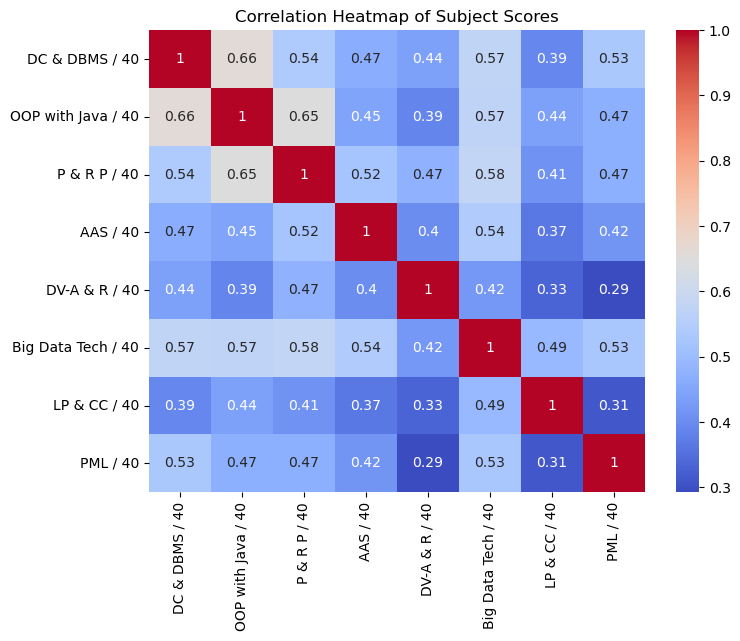

In [18]:
# Heatmap: Correlation matrix of subject scores
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['DC & DBMS / 40', 'OOP with Java / 40',
       'P & R P / 40', 'AAS / 40', 'DV-A & R / 40', 'Big Data Tech / 40',
       'LP & CC / 40', 'PML / 40']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Subject Scores')
plt.show()

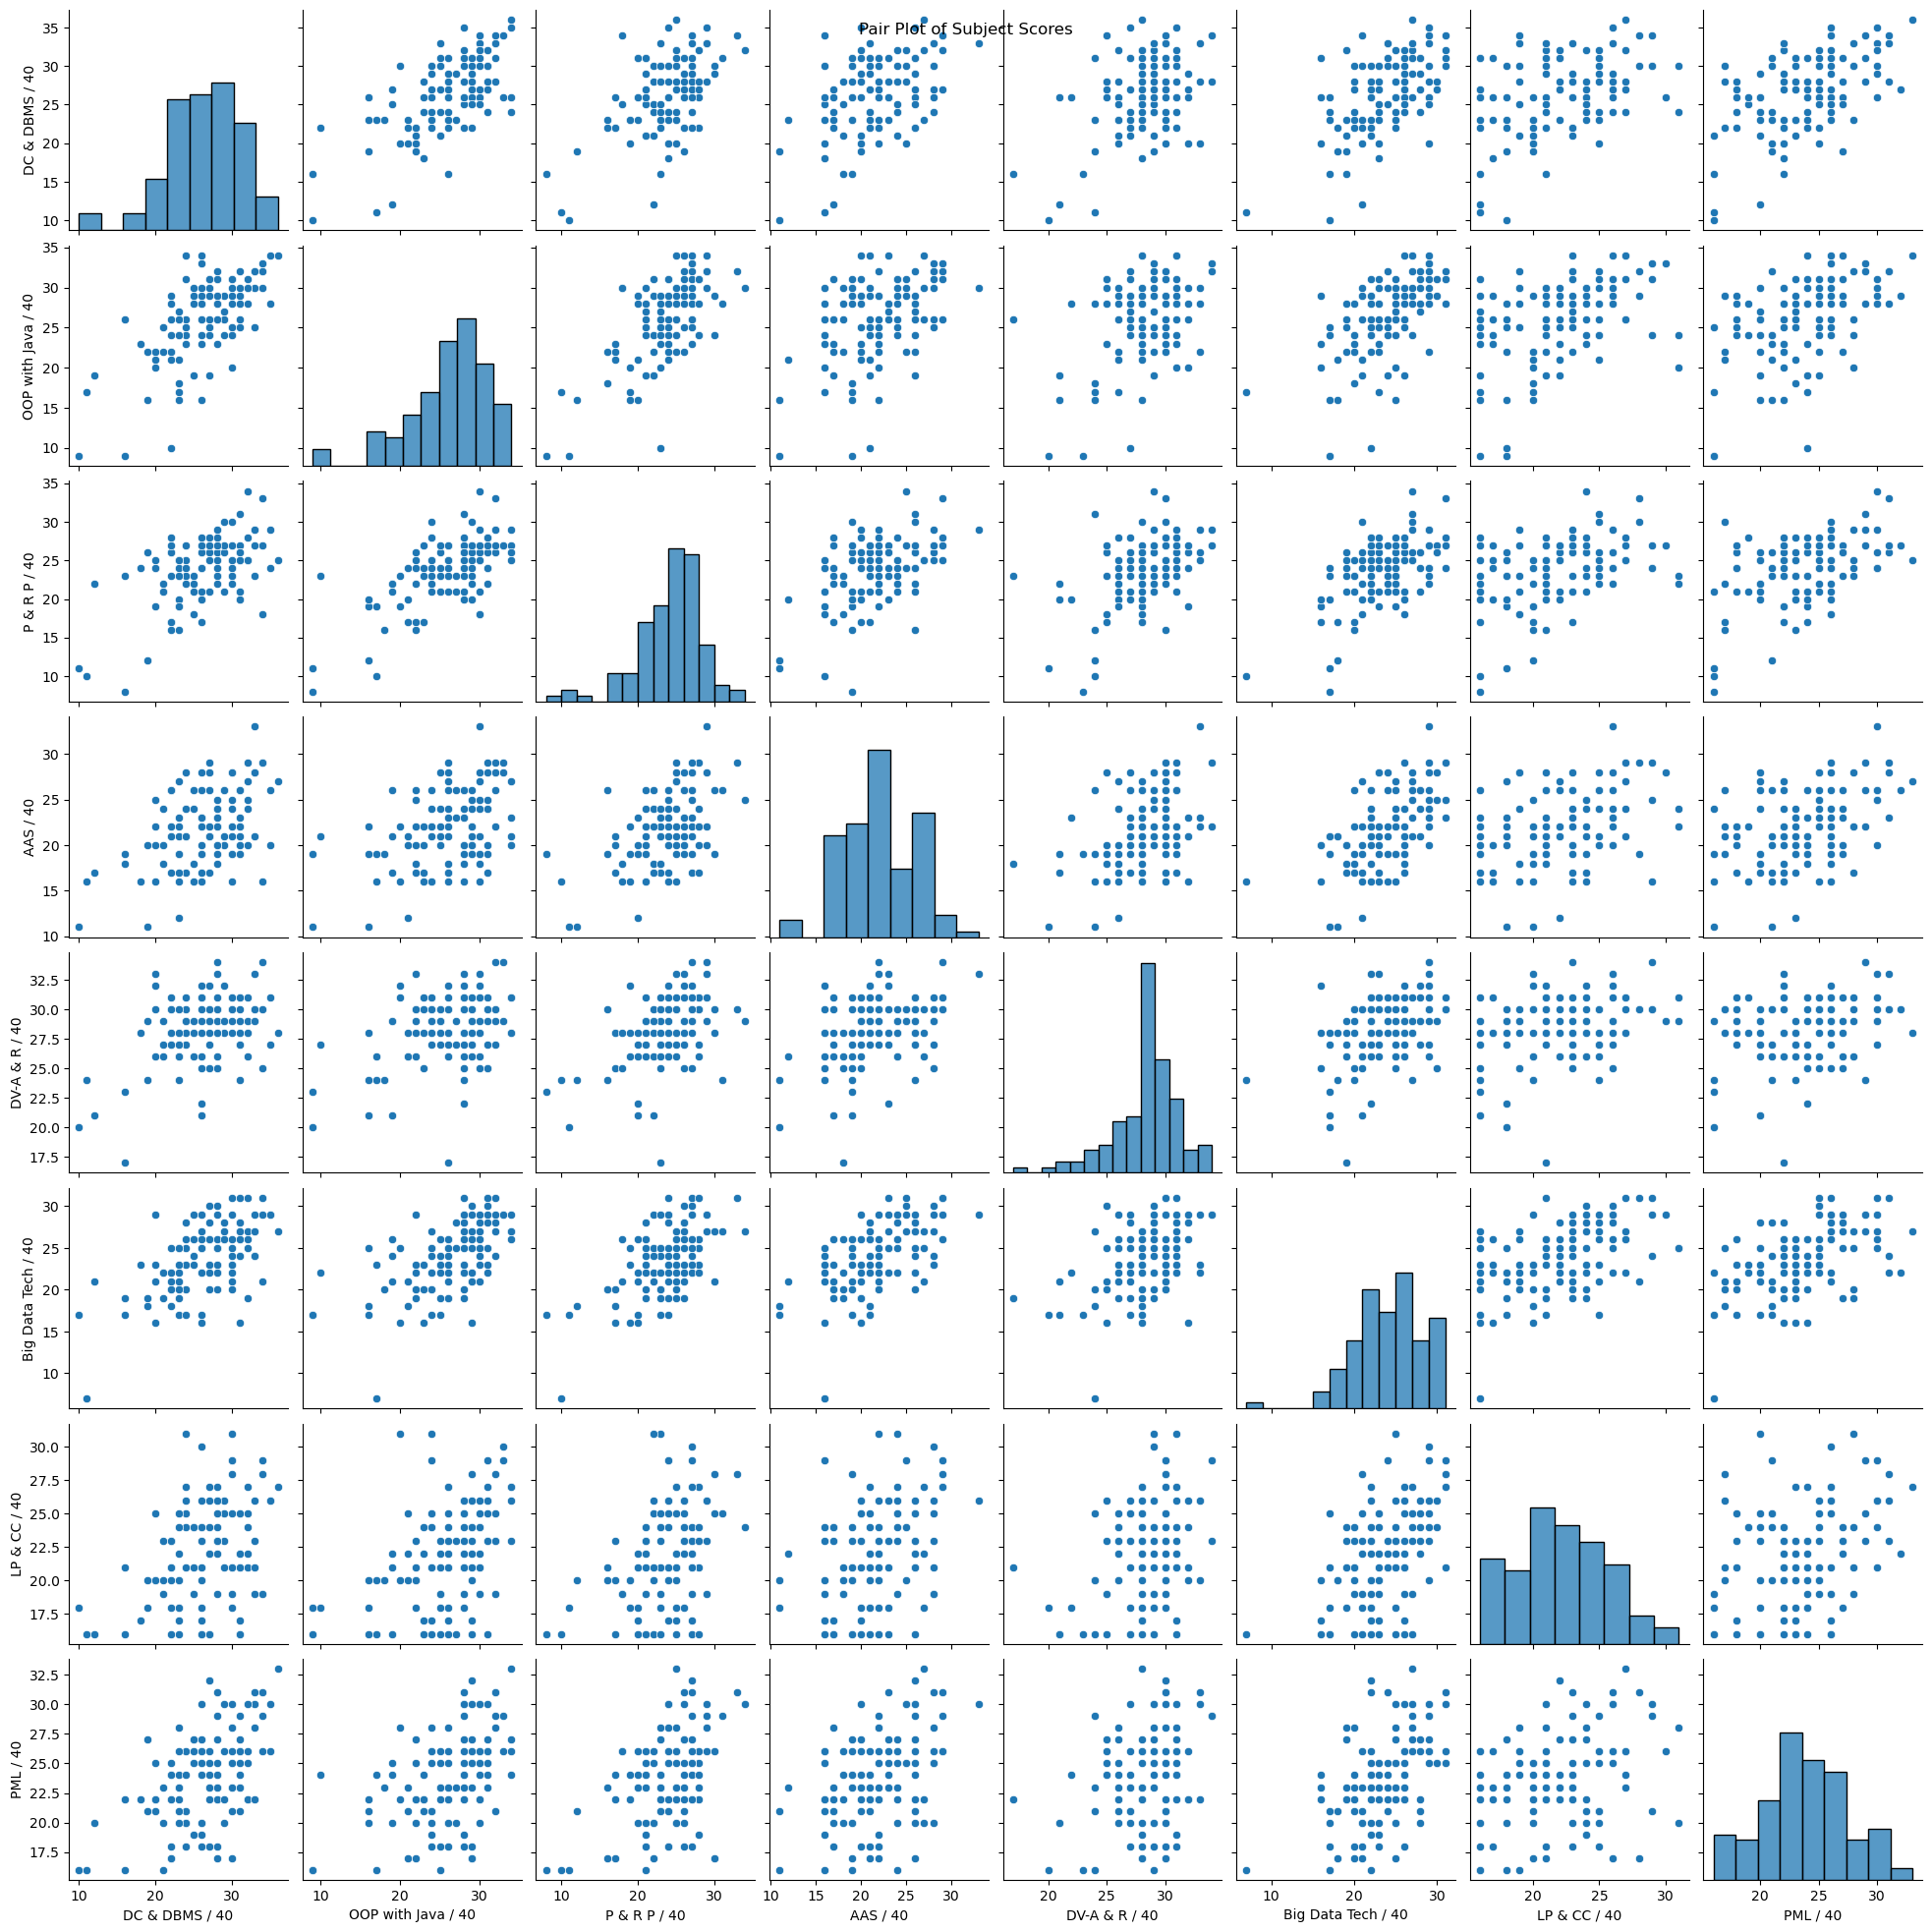

In [19]:
# Pair Plot: Relationships between scores in all subjects
sns.pairplot(merged_df[['DC & DBMS / 40', 'OOP with Java / 40',
       'P & R P / 40', 'AAS / 40', 'DV-A & R / 40', 'Big Data Tech / 40',
       'LP & CC / 40', 'PML / 40']])
plt.suptitle('Pair Plot of Subject Scores')
plt.show()


<Figure size 1000x600 with 0 Axes>

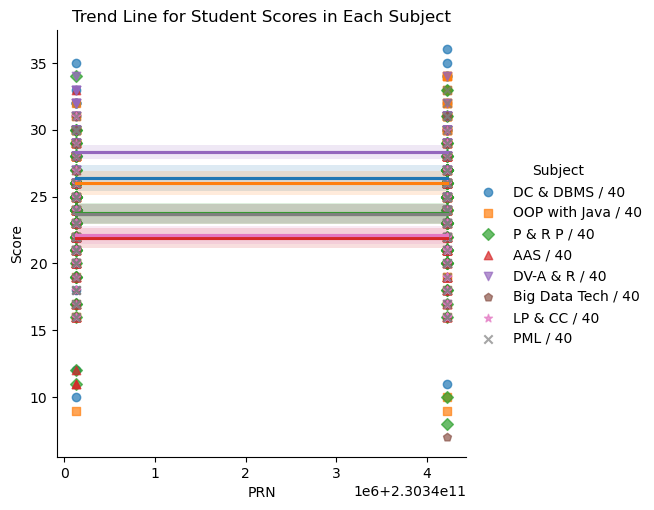

In [20]:
# Melt the dataframe to make it long format for plotting
melted_df = merged_df.melt(id_vars=['PRN', 'Name of Student', 'Institute'], value_vars=['DC & DBMS / 40', 'OOP with Java / 40',
       'P & R P / 40', 'AAS / 40', 'DV-A & R / 40', 'Big Data Tech / 40',
       'LP & CC / 40', 'PML / 40'], var_name='Subject', value_name='Score')

# Set up marker styles for each subject
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'x']

# Plot a trend line for each subject's score
plt.figure(figsize=(10, 6))
sns.lmplot(x='PRN', y='Score', data=melted_df, hue='Subject', markers=markers, scatter_kws={'alpha':0.7})
plt.title('Trend Line for Student Scores in Each Subject')
plt.xlabel('PRN')
plt.ylabel('Score')
plt.show()

In [22]:
# Rank students based on total marks
merged_df['Rank'] = merged_df['Total / 320'].rank(ascending=False, method='min')

# Sort the DataFrame by rank in ascending order
sorted_df = merged_df.sort_values(by='Rank')

# Display sorted student ranks and total marks
print(sorted_df[['Name of Student', 'Total / 320', 'Rank']])

               Name of Student  Total / 320   Rank
61                Viraj Prabhu          248    1.0
68    Gawade Satyam Nandkishor          244    2.0
24                   Koyel Roy          243    3.0
106             Vallabh Ghodke          237    4.0
44       Shubham Shyam Bhopale          235    5.0
..                         ...          ...    ...
41   Shamli Chandrakant Sarode          148  109.0
55             Huỳnh Trung Tru          141  110.0
64   Chinmay Prabhakar Barhate          124  111.0
102     Sonawane Chetan Ramesh          117  112.0
17                Divya Thakur          112  113.0

[113 rows x 3 columns]


In [23]:
ranker=sorted_df[['Name of Student', 'Total / 320', 'Rank']]

In [27]:
ranker.head(60)

,Name of Student,Total / 320,Rank
61,Viraj Prabhu,248,1.0
68,Gawade Satyam Nandkishor,244,2.0
24,Koyel Roy,243,3.0
106,Vallabh Ghodke,237,4.0
44,Shubham Shyam Bhopale,235,5.0
28,Mayank Goyal,231,6.0
100,Shreeya Chavan,230,7.0
81,Mahajan Gururaj Vijaykumar,230,7.0
104,Tejveer Singh Pundhir,228,9.0
92,Rajpurohit Gaurav Narayansinh,228,9.0


In [28]:
ranker.tail(60)

,Name of Student,Total / 320,Rank
101,Singh Ajay Rachhpal,199,51.0
42,Shashwat Bangar,198,55.0
1,Ahmad Raza Khan,198,55.0
20,Hrishikesh Hari Khandagale,198,55.0
62,Chaudhari Prachi Vinayak,198,55.0
15,Dhikale Kaveri Dattatraya,198,55.0
7,Arpit Shrivastav,197,60.0
18,Dnyaneshwar Laxman Mane,197,60.0
79,Rangnath,196,62.0
96,Seema Kumari Swami,196,62.0


In [29]:
# Group students by total marks and count the number of students in each group
marks_counts = merged_df.groupby('Total / 320').size().reset_index(name='No of Students')

# Display different levels of total marks and the number of students who scored those marks
print(marks_counts)

    Total / 320  No of Students
0           112               1
1           117               1
2           124               1
3           141               1
4           148               1
..          ...             ...
59          235               1
60          237               1
61          243               1
62          244               1
63          248               1

[64 rows x 2 columns]


In [34]:
marks_counts.sort_values(by='No of Students').tail(60)

,Total / 320,No of Students
37,202,1
43,209,1
45,211,1
46,212,1
51,218,1
52,219,1
53,221,1
55,226,1
58,231,1
59,235,1
